### Logistic Regression Implementation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

# Create the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=15)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [4]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

score = accuracy_score(y_pred, y_test)
print(score)
print("Classification report")
print(classification_report(y_pred, y_test))
print("Confusion matrix")
print(confusion_matrix(y_pred, y_test))

0.9166666666666666
Classification report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       160
           1       0.90      0.92      0.91       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Confusion matrix
[[146  14]
 [ 11 129]]


### Hyperparameter Tuning And Cross Validation


#### GridSearchCV: Core Concepts

**Purpose:**
Automated **hyperparameter tuning** for machine learning models. It systematically searches for the best combination of model parameters that yield the highest performance.

**Mechanism:**
Combines **Grid Search** with **Cross-Validation (CV)**.

1.  **Grid Definition:** You define a 'grid' (`param_grid`) of specific hyperparameter values you want to test (e.g., different values for `C`, `gamma`, or `kernel` in an SVM).
2.  **Exhaustive Search:** It tries _every possible combination_ of the parameters specified in the grid.
3.  **Cross-Validation:** For _each combination_, it performs k-fold cross-validation (`cv` parameter) on the training data. This involves splitting the training data into `k` folds, training the model on `k-1` folds, and validating on the remaining fold, repeating `k` times.
4.  **Performance Metric:** The performance for each combination is evaluated using a specified metric (`scoring`, e.g., 'accuracy', 'f1', 'roc_auc'). The scores from the `k` folds are typically averaged.
5.  **Best Combination:** Identifies the hyperparameter combination that resulted in the best average cross-validated score (`best_score_`).
6.  **Final Model:** By default, it refits a new model using the best parameter combination found (`best_params_`) on the _entire_ training dataset. This refitted model is stored in `best_estimator_`.

**Key Inputs:**

- `estimator`: The model instance (e.g., `SVC()`).
- `param_grid`: Dictionary mapping parameter names (strings) to lists of values to try.
- `scoring`: String or callable defining the evaluation metric.
- `cv`: Integer or CV splitter object defining the cross-validation strategy.

**Key Outputs (Attributes after fitting):**

- `best_params_`: Dictionary of the optimal hyperparameter combination found.
- `best_score_`: Mean cross-validated score of the best combination.
- `best_estimator_`: Model refitted with the best parameters on the whole training set.
- `cv_results_`: Dictionary with detailed scores and timings for all combinations tested.

**Pros:**

- **Systematic:** Guarantees checking all specified parameter combinations.
- **Robust:** Uses cross-validation to prevent overfitting during hyperparameter selection.

**Cons:**

- **Computationally Expensive:** The number of models trained = (number of combinations) × (number of CV folds). Can be very slow for large grids or datasets.
- **Curse of Dimensionality:** Search space grows exponentially with the number of hyperparameters.


In [6]:
model = LogisticRegression()

# Define the list of penalties to be tested during hyperparameter tuning
penalty = ["l1", "l2", "elasticnet"]

# Define the range of regularization strength (C values) to be tested
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define the solvers to be tested for optimization
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]

In [7]:
params = dict(penalty=penalty, C=c_values, solver=solver)

In [8]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()

In [9]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=model, param_grid=params, scoring="accuracy", cv=cv, n_jobs=-1
)

In [10]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [11]:
grid.fit(X_train, y_train)

c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [12]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [13]:
grid.best_score_

0.9242857142857142

In [14]:
y_pred = grid.predict(X_test)

In [15]:
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.92
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       165
           1       0.89      0.94      0.91       135

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[149  16]
 [  8 127]]


#### RandomizedSearchCV

**Purpose:**
Automated **hyperparameter tuning**, like `GridSearchCV`, but designed to be more efficient, especially for large hyperparameter search spaces.

**Mechanism:**
Combines **Random Sampling** with **Cross-Validation (CV)**.

Tries a fixed number of random combinations from the hyperparameter ranges/distributions you specify

1.  **Parameter Space Definition:** Instead of a grid of specific values, you define a search space using lists of values or, more powerfully, statistical distributions (e.g., uniform, log-uniform, integer ranges from `scipy.stats`) for each hyperparameter in `param_distributions`.
2.  **Random Sampling:** It does _not_ try all combinations. Instead, it randomly samples a _fixed number_ (`n_iter`) of complete hyperparameter sets from the defined space/distributions.
3.  **Cross-Validation:** For _each sampled combination_, it performs k-fold cross-validation (`cv`) on the training data, evaluating performance using the specified `scoring` metric. The scores across the `k` folds are averaged.
4.  **Best Sampled Combination:** It identifies the hyperparameter combination _from the sampled set_ that resulted in the best average cross-validated score (`best_score_`).
5.  **Final Model:** By default, it refits a model using the best parameter combination found (`best_params_`) on the _entire_ training dataset. This refitted model is stored in `best_estimator_`.

**Key Inputs:**

- `estimator`: The model instance (e.g., `RandomForestClassifier()`).
- `param_distributions`: Dictionary mapping parameter names (strings) to lists _or statistical distributions_ to sample from.
- `n_iter`: The number of parameter combinations to sample. Controls the trade-off between runtime and the quality/thoroughness of the search.
- `scoring`: String or callable defining the evaluation metric.
- `cv`: Integer or CV splitter object defining the cross-validation strategy.
- `random_state`: An integer seed to ensure the random sampling is reproducible.

**Key Outputs (Attributes after fitting):**

- `best_params_`: Dictionary of the best hyperparameter combination _found among the samples_.
- `best_score_`: Mean cross-validated score of the best combination found.
- `best_estimator_`: Model refitted with the best parameters found on the whole training set.
- `cv_results_`: Dictionary with detailed scores and timings for all combinations _sampled_.

**Pros:**

- **Efficiency:** Much faster than `GridSearchCV` for large search spaces or many hyperparameters, as it explores only a fixed number of combinations.
- **Flexibility:** Can effectively sample from continuous parameter distributions.
- Often finds very good (though not guaranteed optimal) hyperparameters quickly.

**Cons:**

- **Not Exhaustive:** May miss the absolute best hyperparameter combination if it's not sampled within `n_iter` trials.
- Performance depends on `n_iter` and the 'luck' of the random sampling (mitigated by setting `random_state` for reproducibility).


In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Define only compatible combinations
params = {
    "penalty": ["l1", "l2"],  # 'elasticnet' and 'none' can also be used with 'saga'
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "saga"],  # solvers that support both l1 and l2
    "max_iter": [100, 200, 300],
}

model = LogisticRegression()

randomcv = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    cv=5,
    scoring="accuracy",
    n_iter=10,  # optional: set number of iterations
    random_state=42,
)

randomcv.fit(X_train, y_train)

c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_ite

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [17]:
randomcv.best_score_

0.9228571428571428

In [18]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.1}

In [19]:
y_pred = randomcv.predict(X_test)

In [20]:
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9266666666666666
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       165
           1       0.90      0.95      0.92       135

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[150  15]
 [  7 128]]


### Logistic Regression For Multiclass Classification Problem


In [21]:
# Create a synthetic dataset for a multiclass classification problem
# n_samples: Number of samples in the dataset
# n_features: Total number of features
# n_informative: Number of informative features
# n_classes: Number of target classes
# random_state: Seed for reproducibility
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=15
)

In [22]:
y

array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [24]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(multi_class="ovr")
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [25]:
y_pred

array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [26]:
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.79
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.73      0.81      0.77        91
           2       0.82      0.71      0.76       112

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[84  3 10]
 [10 74  7]
 [ 8 25 79]]


### Logistic Regression for Imbalanced Dataset


In [27]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter

In [28]:
## Generate an imbalanced dataset
# n_samples: Total number of samples in the dataset
# n_features: Total number of features
# n_clusters_per_class: Number of clusters per class
# n_redundant: Number of redundant features
# weights: Proportion of samples assigned to each class (e.g., 99% for class 0)
# random_state: Seed for reproducibility
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_clusters_per_class=1,
    n_redundant=0,
    weights=[0.99],
    random_state=10,
)

In [29]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [30]:
Counter(y)

Counter({0: 9846, 1: 154})

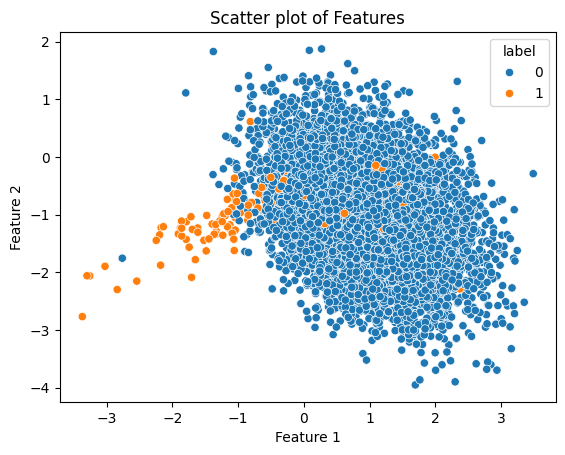

In [31]:
df = pd.DataFrame(X)
df["label"] = y  # Add target as a new column

# Plot using correct keyword arguments
sns.scatterplot(x=df[0], y=df[1], hue=df["label"])

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of Features")
plt.show()

In [32]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [33]:
class_weight = [{0: w, 1: y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [34]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [35]:
## Hyperparamter tuning
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
class_weight = [{0: w, 1: y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [36]:
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [37]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv=cv)

In [39]:
grid.fit(X_train, y_train)

c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_ite

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [40]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [41]:
y_pred = grid.predict(X_test)

In [42]:
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.992
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2486
           1       0.40      0.86      0.55        14

    accuracy                           0.99      2500
   macro avg       0.70      0.92      0.77      2500
weighted avg       1.00      0.99      0.99      2500

[[2468   18]
 [   2   12]]


## ROC Curve and AUC Score

### ROC Curve (Receiver Operating Characteristic)

- **What is it?** A graphical plot illustrating the diagnostic ability of a binary classifier system as its discrimination **threshold** is varied. By default it is 0.5 all values where probability is less than 0.5 is 0 else 1. But based on domain knowledge we can tweek this.
- **Axes:**
  - **Y-axis:** True Positive Rate (TPR) or Sensitivity or Recall
    - Formula: $TPR = \frac{TP}{TP + FN}$
    - Interpretation: Proportion of actual positives that are correctly identified.
  - **X-axis:** False Positive Rate (FPR) or Fall-out
    - Formula: $FPR = \frac{FP}{FP + TN}$
    - Interpretation: Proportion of actual negatives that are incorrectly identified as positives. (Note: $FPR = 1 - Specificity$)
- **How it's created:** By plotting TPR vs. FPR at various threshold settings for the classifier's output scores (e.g., probabilities). Each point on the curve represents a specific threshold.
- **Interpretation:**
  - Shows the **trade-off** between sensitivity (correctly identifying positives) and specificity (1-FPR, correctly identifying negatives).
  - **Top-left corner (0, 1):** Represents a perfect classifier (100% TPR, 0% FPR).
  - **Diagonal line (y=x):** Represents a random classifier (no discriminative power). Points below the diagonal indicate performance worse than random guessing.
  - The closer the curve follows the top-left border, the better the classifier's performance.

### AUC (Area Under the ROC Curve)

- **What is it?** The area under the ROC curve. It provides a single scalar value summarizing the performance of the classifier across _all_ possible thresholds.
- **Range:** 0 to 1.
- **Interpretation:**
  - **AUC = 1:** Perfect classifier.
  - **AUC = 0.5:** Random classifier (no discrimination ability).
  - **AUC < 0.5:** Classifier performs worse than random guessing (often indicates swapped labels or a poorly performing model).
  - **0.5 < AUC < 1:** Realistic classifier performance. Higher values indicate better discrimination ability.
  - **Probabilistic Interpretation:** AUC represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

### Why Use ROC/AUC?

1.  **Threshold Independence:** AUC summarizes performance across all thresholds, avoiding the need to pick a specific one for evaluation.
2.  **Insensitivity to Class Imbalance:** Unlike accuracy, ROC curves and AUC are less sensitive to skewed datasets because they are based on TPR and FPR, which are calculated independently for each class.
3.  **Model Comparison:** AUC provides a single number to compare different models. A model with a higher AUC generally has better overall discrimination performance.


In [43]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [44]:
# Generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [46]:
# Create a dummy model with default probabilities of 0 for all test samples
# This represents a baseline model that predicts the negative class (0) for all instances
dummy_model_prob = [0 for _ in range(len(y_test))]

# Output the dummy model probabilities
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Prediction based on probability
model_prob = model.predict_proba(X_test)

In [49]:
model_prob

array([[8.17237415e-02, 9.18276259e-01],
       [1.13344259e-01, 8.86655741e-01],
       [9.76832552e-01, 2.31674481e-02],
       [1.81093915e-02, 9.81890609e-01],
       [4.54686794e-02, 9.54531321e-01],
       [2.03249282e-01, 7.96750718e-01],
       [9.93162656e-01, 6.83734407e-03],
       [9.45976087e-01, 5.40239126e-02],
       [8.69028777e-03, 9.91309712e-01],
       [5.91398651e-01, 4.08601349e-01],
       [9.85074068e-01, 1.49259319e-02],
       [8.29281652e-02, 9.17071835e-01],
       [1.37466495e-01, 8.62533505e-01],
       [5.20697767e-03, 9.94793022e-01],
       [9.60063575e-01, 3.99364247e-02],
       [9.50688533e-01, 4.93114672e-02],
       [2.10393564e-02, 9.78960644e-01],
       [8.30240259e-01, 1.69759741e-01],
       [9.62818718e-01, 3.71812822e-02],
       [3.21780632e-02, 9.67821937e-01],
       [9.96085581e-01, 3.91441895e-03],
       [1.14045645e-01, 8.85954355e-01],
       [1.80352806e-01, 8.19647194e-01],
       [4.30414556e-01, 5.69585444e-01],
       [4.115915

In [50]:
# Lets focus on the positive outcome
model_prob = model_prob[:, 1]

In [51]:
# Lets calulcate the scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


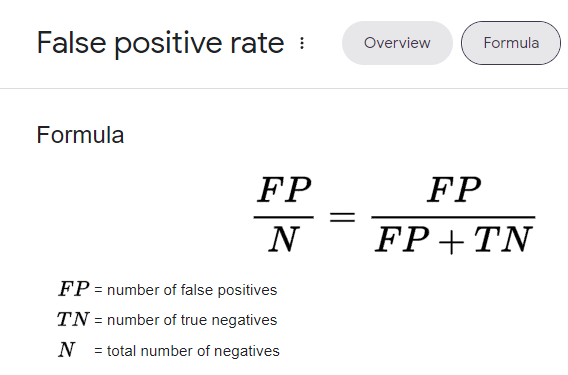
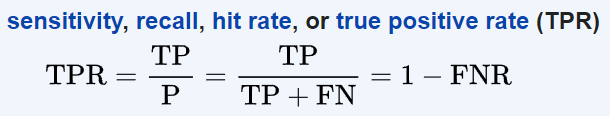


In [52]:
# Calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [53]:
# The `thresholds` variable contains the decision thresholds used to calculate the ROC curve.
# These thresholds are derived from the predicted probabilities of the positive class.
# The first value in `thresholds` is `inf` (infinity), which represents the starting point of the curve.
# Subsequent values correspond to decreasing thresholds, which determine the trade-off between TPR (True Positive Rate) and FPR (False Positive Rate).
# By default it is 0.5
thresholds

array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

In [54]:
model_fpr, model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

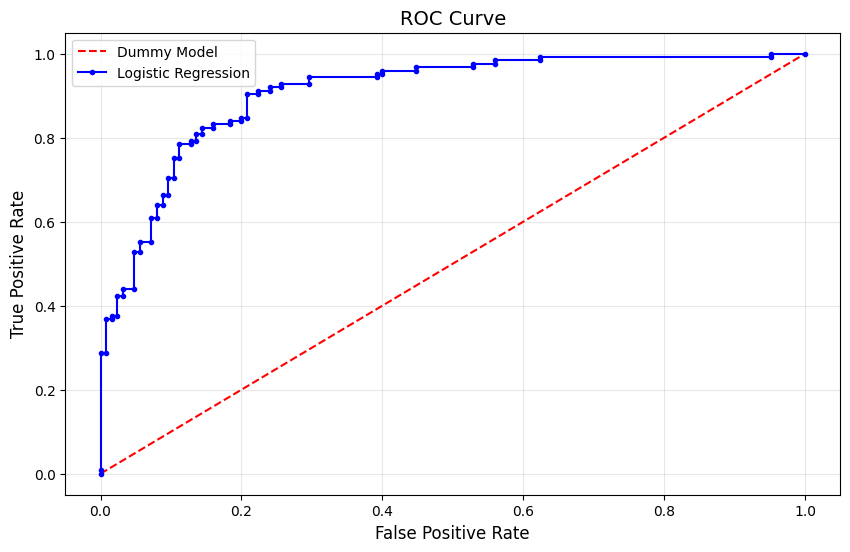

In [55]:
# Plot the ROC curve for the model
pyplot.figure(figsize=(10, 6))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy Model", color="red")
pyplot.plot(model_fpr, model_tpr, marker=".", label="Logistic Regression", color="blue")

# Add axis labels
pyplot.xlabel("False Positive Rate", fontsize=12)
pyplot.ylabel("True Positive Rate", fontsize=12)

# Add title
pyplot.title("ROC Curve", fontsize=14)

# Add gridlines
pyplot.grid(alpha=0.3)

# Show the legend
pyplot.legend()

# Show the plot
pyplot.show()

C:\Users\ribhav.jain\AppData\Local\Temp\ipykernel_20528\848996781.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


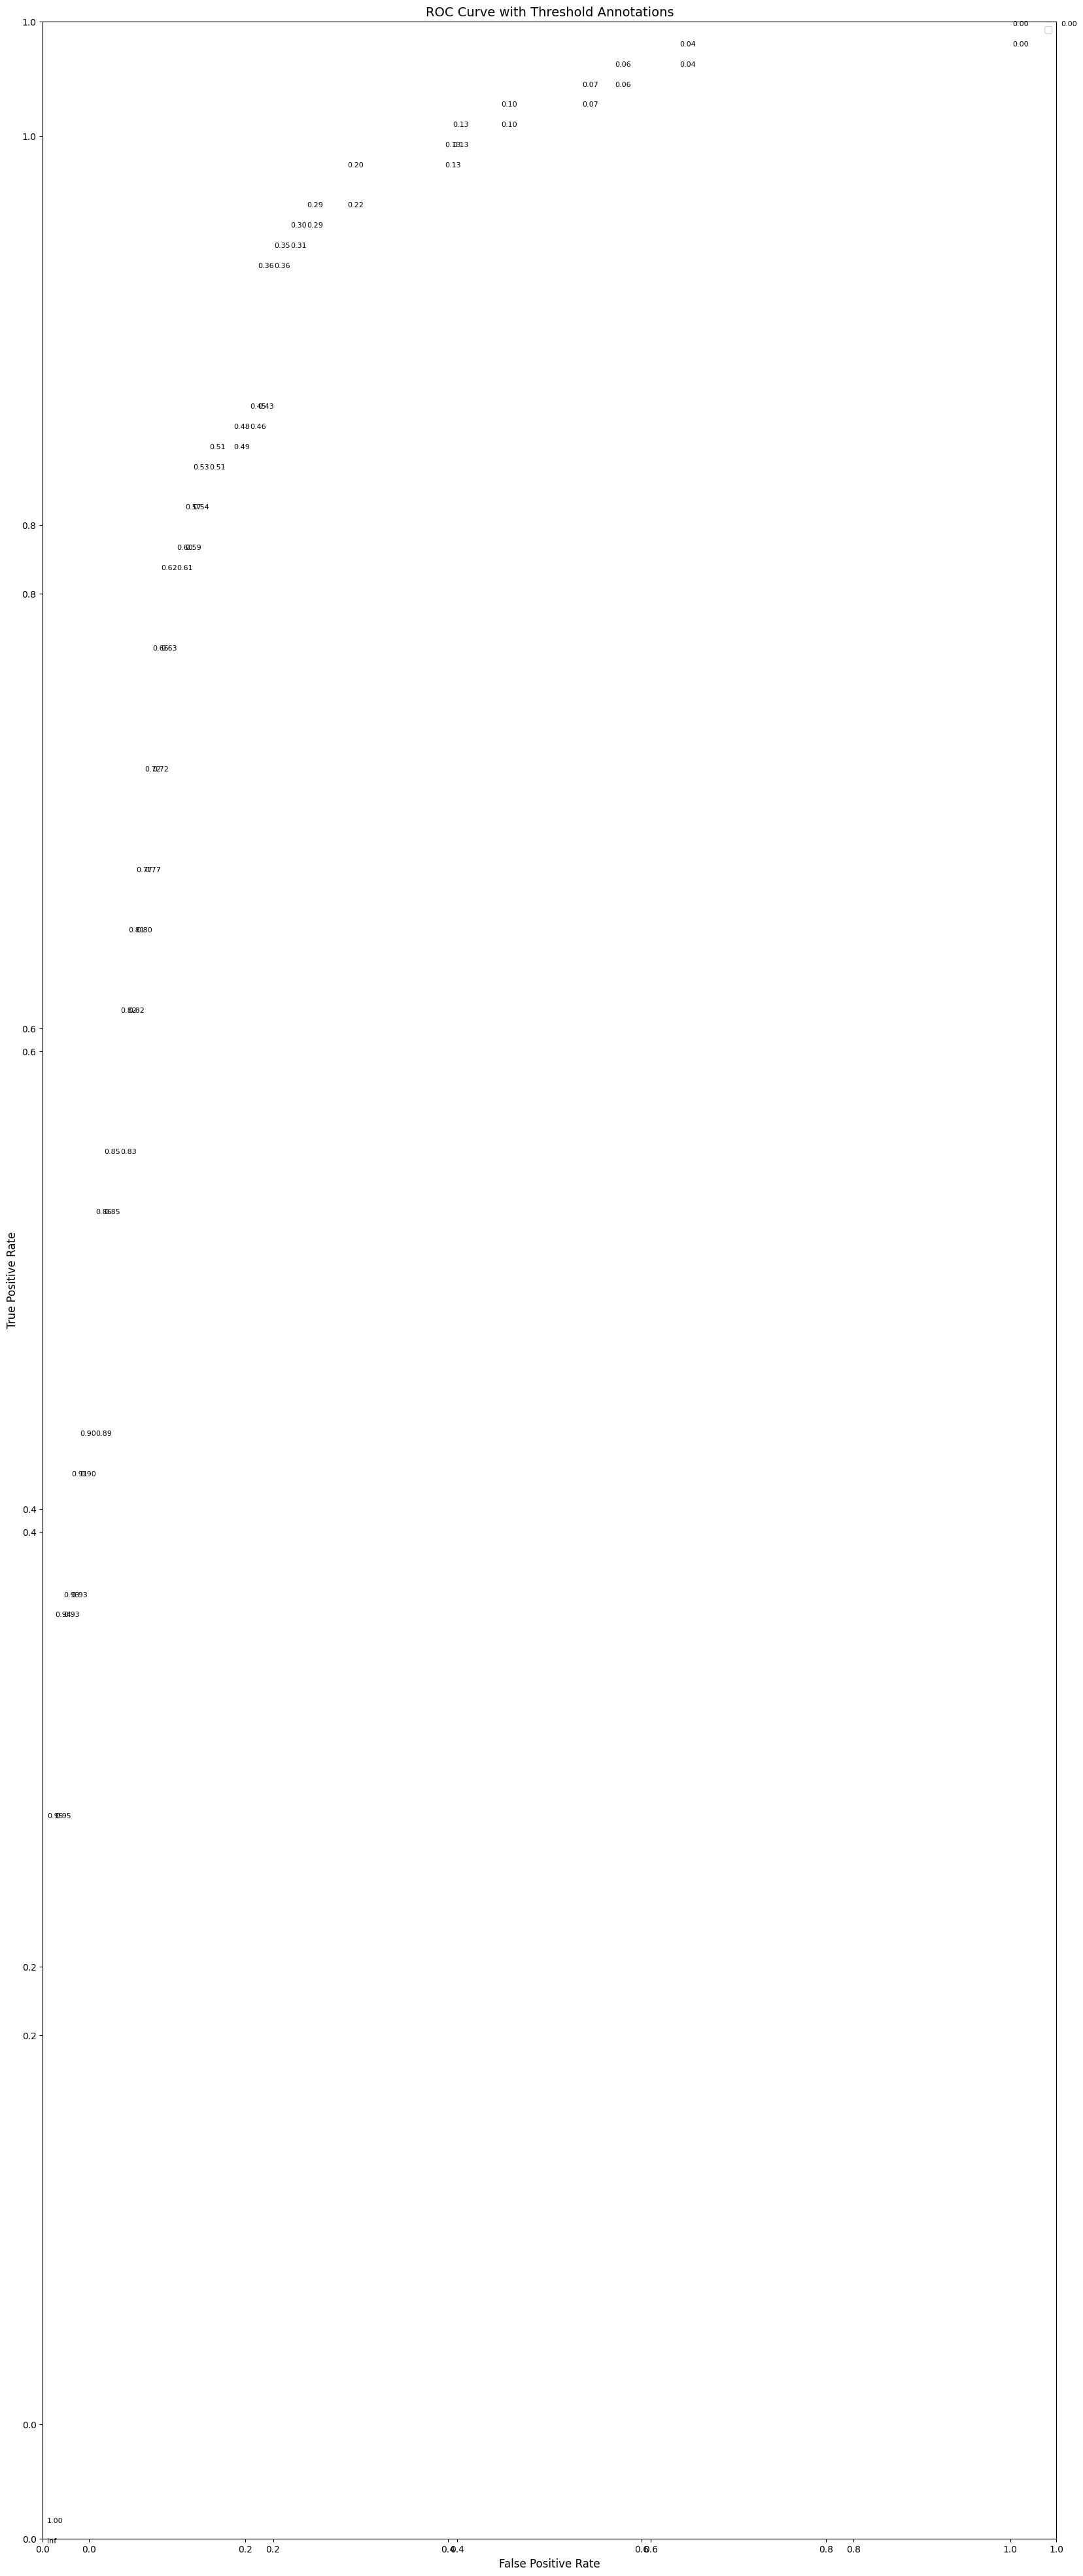

In [56]:
# Plot the ROC curve for the model
# Create a figure with a specified size
fig = pyplot.figure(figsize=(20, 50))

# Plot the dummy model's ROC curve
pyplot.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy Model", color="red")

# Plot the logistic regression model's ROC curve
pyplot.plot(model_fpr, model_tpr, marker=".", label="Logistic Regression", color="blue")

# Add annotations for thresholds
ax = fig.add_subplot(111)
for fpr, tpr, threshold in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(
        f"{threshold:.2f}",
        xy=(fpr, tpr),
        textcoords="offset points",
        xytext=(5, -5),
        fontsize=8,
    )

# Add axis labels
pyplot.xlabel("False Positive Rate", fontsize=12)
pyplot.ylabel("True Positive Rate", fontsize=12)

# Add a title
pyplot.title("ROC Curve with Threshold Annotations", fontsize=14)

# Add a legend
pyplot.legend()

# Display the plot
pyplot.show()